In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df = pd.read_excel("climate_survey-2023.xlsx")
df.describe()

,id,area,sex,age,edu,job,marry,child,income,pol,...,opinion5,opinion6,opinion7,opinion8,opinion9,opinion10,opinion11,opinion12,control_n,prac_intent
count,3.088000e+03,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,2889.000000,...,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,7.238860e+05,7.050194,0.496438,45.293394,2.543394,6.852979,1.721179,0.582902,5.178109,2.964001,...,1.984456,2.447215,2.827073,3.691710,3.738342,3.256477,2.934585,3.142163,8.624028,10.572215
std,3.439020e+05,4.591411,0.500068,13.848762,0.644476,2.937380,0.595016,0.493159,2.560574,0.874432,...,0.953614,0.949553,0.952323,0.909673,0.918545,0.911516,0.889558,0.911466,2.540026,2.206236
min,1.220000e+02,1.000000,0.000000,19.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
25%,4.196480e+05,2.000000,0.000000,34.000000,2.000000,5.000000,1.000000,0.000000,3.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,7.000000,9.000000
50%,7.357820e+05,8.000000,0.000000,46.000000,2.000000,6.000000,2.000000,1.000000,5.000000,3.000000,...,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,9.000000,11.000000
75%,1.051656e+06,10.000000,1.000000,57.000000,3.000000,9.000000,2.000000,1.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,10.000000,12.000000
max,1.267057e+06,17.000000,1.000000,69.000000,4.000000,12.000000,3.000000,1.000000,11.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000,15.000000


In [5]:
X_cols = ['concern', 
          'aware_cause', 'aware_solve', 'aware_tot', 
           'satis_mean2', 
           'risk', 'risk_me', 'impact_n', 'import_me',
           'eco_at', 'prior_eco',
           'behave_me', 'behave_other', 
           'control_n']
damage_cols = ['damage_me', 'damage_family', 'damage_commun', 
               'damage_country', 'damage_country_high', 'damage_country_low', #damage_country
               'damage_future', 'damage_org']
psychological_cols = ['distance_index', 'distance_weighted']
motive_cols = ['motive_profit', 'motive_norm', 'motive_pleasure', 
                'motive_bio', 'motive_selfish', 'motive_prosocial', 
                'motive_selfinterest', 'motive_environmental',
                'motive_me', 'motive_com']
Y_cols = ['prac_tot', 'prac_tot2', 'prac_ratio', 'prac_intent']
C_cols = ['sex', 'age', 'area', 'edu', 'job', 'child', 'income', 'pol', 
           'media_trust', 'life_satis']

### 독립변인과 종속변인 관계

In [6]:
data = df[X_cols + motive_cols + Y_cols + C_cols]
data = data.dropna()
data.describe()

,concern,aware_cause,aware_solve,aware_tot,satis_mean2,risk,risk_me,impact_n,import_me,eco_at,...,sex,age,area,edu,job,child,income,pol,media_trust,life_satis
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.00000,2868.000000,2868.000000,...,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,3.824965,3.527197,3.331590,9.937238,2.613513,4.124826,3.642259,4.27371,4.102859,3.650279,...,0.485704,45.761855,7.039052,2.555439,6.809972,0.593445,5.239540,2.962343,2.949093,5.702580
std,0.736732,0.662114,0.699708,3.502488,0.543429,0.651074,0.735980,1.07548,0.710835,1.115923,...,0.499883,13.837115,4.594610,0.644849,2.921687,0.491276,2.564578,0.873980,0.800803,1.991025
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,...,0.000000,19.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,8.000000,2.303030,4.000000,3.000000,4.00000,4.000000,3.000000,...,0.000000,35.000000,2.000000,2.000000,5.000000,0.000000,3.000000,2.000000,2.000000,5.000000
50%,4.000000,4.000000,3.000000,10.000000,2.606061,4.000000,4.000000,5.00000,4.000000,4.000000,...,0.000000,47.000000,8.000000,3.000000,6.000000,1.000000,5.000000,3.000000,3.000000,6.000000
75%,4.000000,4.000000,4.000000,13.000000,3.000000,5.000000,4.000000,5.00000,5.000000,4.000000,...,1.000000,58.000000,10.000000,3.000000,9.000000,1.000000,7.000000,4.000000,3.000000,7.000000
max,5.000000,5.000000,5.000000,16.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,1.000000,69.000000,17.000000,4.000000,12.000000,1.000000,11.000000,5.000000,5.000000,10.000000


In [7]:
data['motive_socialinterest'] = data['motive_norm'] + data['motive_prosocial']

## 빈도분포

### 성별

In [ ]:
frequency = data['sex'].value_counts()
percentage = data['sex'].value_counts(normalize=True) * 100

In [ ]:
# make table
frequency_table_sex = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})
frequency_table_sex.index = ['Male', 'Female']
print(frequency_table_sex)

        Frequency  Percentage (%)
Male         1475       51.429568
Female       1393       48.570432


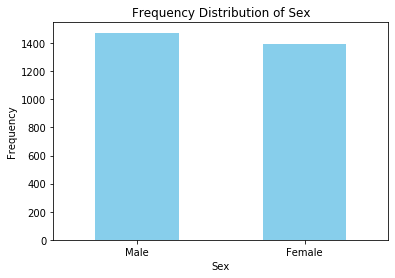

In [18]:
ax = frequency.plot(kind='bar', color='skyblue')

# category names
ax.set_xticklabels(["Male", "Female"], rotation=0)

# title & label
plt.title('Frequency Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')

# print graph
plt.show()

### 연령

In [43]:
print(min(data['age']))
print(max(data['age']))

19
69


In [28]:
age_avg = data['age'].mean()
age_sd = data['age'].std()
print(f"{age_avg:.4f}({age_sd:.4f})")

45.7619(13.8371)


In [44]:
bins = [19, 29, 39, 49, 59, 69]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
data['age_range'] = pd.cut(data['age'], 
                           bins=bins, labels=labels, 
                           right=True)

frequency = data['age_range'].value_counts()
percentage = data['age_range'].value_counts(normalize=True) * 100

In [45]:
# make table
frequency_table_age = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})

frequency_table_age = frequency_table_age.sort_index()
print(frequency_table_age)

       Frequency  Percentage (%)
20-30        463       16.331570
30-40        473       16.684303
40-50        608       21.446208
50-60        672       23.703704
60-70        619       21.834215


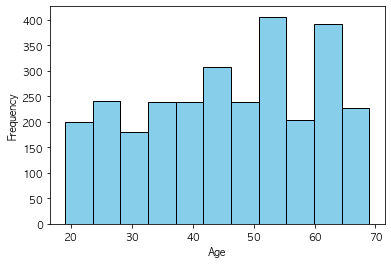

In [29]:
plt.hist(data['age'], bins=11, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

### 교육 수준

In [29]:
frequency = data['edu'].value_counts()
percentage = data['edu'].value_counts(normalize=True) * 100

In [34]:
# make table
frequency_table_edu = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})
frequency_table_edu = frequency_table_edu.sort_index()
frequency_table_edu.index = ['중졸 이하', '고졸', '대졸', '대학원 재학 이상']
print(frequency_table_edu)

           Frequency  Percentage (%)
중졸 이하             50        1.743375
고졸              1367       47.663877
대졸              1259       43.898187
대학원 재학 이상        192        6.694561


#### 연령-교육수준 상관

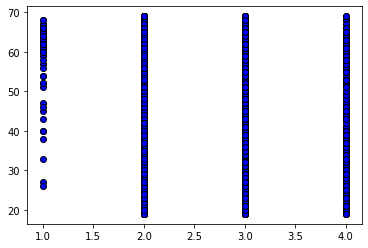

In [59]:
plt.scatter(data['edu'], data['age'],
            color='blue', edgecolor='black')
plt.show()

In [41]:
corr, p_value = stats.pearsonr(data['age'], data['edu'])
print(f'피어슨 상관계수: {corr}')
print(f'p-value: {p_value}')

피어슨 상관계수: -0.2888237778166045
p-value: 3.1746292750959995e-56


### 자녀의 유무

In [46]:
frequency = data['child'].value_counts()
percentage = data['child'].value_counts(normalize=True) * 100

In [49]:
# make table
frequency_table_child = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})
frequency_table_child.index = ['유', '무']
print(frequency_table_child)

   Frequency  Percentage (%)
유       1702       59.344491
무       1166       40.655509


### 가계 월 평균 수입

In [50]:
frequency = data['income'].value_counts()
percentage = data['income'].value_counts(normalize=True) * 100

In [51]:
# make table
frequency_table_income = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})

frequency_table_income = frequency_table_income.sort_index()
# frequency_table_income.index = ['유', '무']
print(frequency_table_income)

    Frequency  Percentage (%)
1         120        4.184100
2         229        7.984658
3         440       15.341702
4         493       17.189679
5         465       16.213389
6         345       12.029289
7         228        7.949791
8         175        6.101813
9         117        4.079498
10        103        3.591353
11        153        5.334728


In [ ]:
income_avg = data['income'].mean()
income_sd = data['income'].std()
print(f"{income_avg:.4f}({income_sd:.4f})")

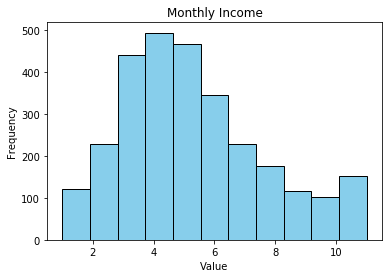

In [57]:
plt.hist(data['income'], bins=11, color='skyblue', edgecolor='black')
plt.title('Monthly Income')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

### 정치성향

In [30]:
frequency = data['pol'].value_counts()
percentage = data['pol'].value_counts(normalize=True) * 100

In [31]:
# make table
frequency_table_pol = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage
})

frequency_table_pol = frequency_table_pol.sort_index()
# frequency_table_income.index = ['유', '무']
print(frequency_table_pol)

     Frequency  Percentage (%)
1.0        116        4.044630
2.0        705       24.581590
3.0       1316       45.885635
4.0        633       22.071130
5.0         98        3.417015


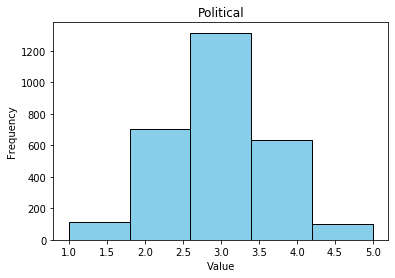

In [ ]:
plt.hist(data['pol'], bins=5, 
         color='skyblue', edgecolor='black'
         )
plt.title('Political')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

### 동기

In [8]:
import matplotlib
matplotlib.rc('font', family='AppleGothic')  
matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
motive_self_avg = np.mean(data['motive_selfinterest'])
motive_soc_avg = np.mean(data['motive_socialinterest'])

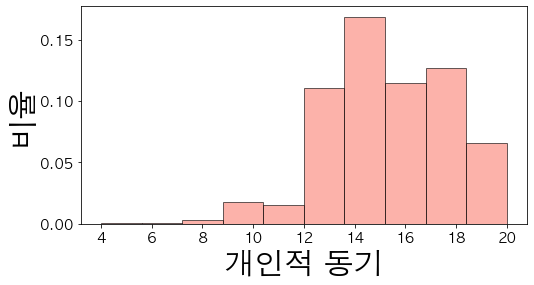

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(data['motive_selfinterest'], bins=10, density=True, 
         color='Salmon', edgecolor='black', alpha=0.6)
# plt.axvline(motive_self_avg, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {motive_self_avg:.2f}')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.xlabel('개인적 동기', fontsize=30)
plt.ylabel('비율', fontsize=30)

# 그래프 출력
plt.show()

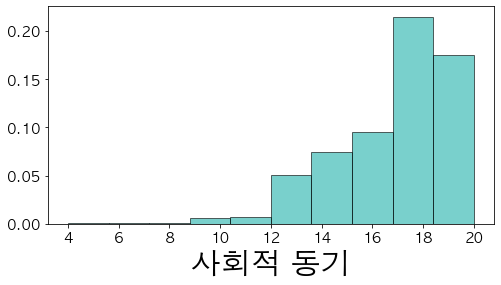

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(data['motive_socialinterest'], bins=10, density=True, 
         color='LightSeaGreen', edgecolor='black', alpha=0.6)
# plt.axvline(motive_soc_avg, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {motive_soc_avg:.2f}')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.xlabel('사회적 동기', fontsize=30)
# plt.ylabel('비율', fontsize=30)

# 그래프 출력
plt.show()

## 상관관계

In [63]:
def calculate_correlation_matrix(df, method='pearson'):
    variables = df.columns
    n = len(variables)
    corr_matrix = np.zeros((n, n))
    p_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if method == 'spearman':
                corr, p_value = stats.spearmanr(df[variables[i]], df[variables[j]])
            else:  # Pearson as default
                corr, p_value = stats.pearsonr(df[variables[i]], df[variables[j]])
            corr_matrix[i, j] = corr
            p_matrix[i, j] = p_value
    
    corr_df = pd.DataFrame(corr_matrix, index=variables, columns=variables)
    p_df = pd.DataFrame(p_matrix, index=variables, columns=variables)
    
    return corr_df, p_df

In [68]:
corr_matrix, p_matrix = calculate_correlation_matrix(data[["aware_tot", "eco_at", "prac_ratio", "motive_selfinterest", "motive_socialinterest"]], method='pearson')

print("Correlation Matrix (Pearson):")
print(corr_matrix)

print("\nP-value Matrix:")
print(p_matrix)

Correlation Matrix (Pearson):
                       aware_tot    eco_at  prac_ratio  motive_selfinterest  \
aware_tot               1.000000  0.161440    0.234145             0.178260   
eco_at                  0.161440  1.000000    0.426691             0.388830   
prac_ratio              0.234145  0.426691    1.000000             0.463613   
motive_selfinterest     0.178260  0.388830    0.463613             1.000000   
motive_socialinterest   0.185211  0.432979    0.422793             0.658630   

                       motive_socialinterest  
aware_tot                           0.185211  
eco_at                              0.432979  
prac_ratio                          0.422793  
motive_selfinterest                 0.658630  
motive_socialinterest               1.000000  

P-value Matrix:
                          aware_tot         eco_at     prac_ratio  \
aware_tot              0.000000e+00   3.345884e-18   5.139275e-37   
eco_at                 3.345884e-18   0.000000e+00  2.9404

In [67]:
corr_matrix, p_matrix = calculate_correlation_matrix(data[["aware_tot", "eco_at", "prac_ratio", "motive_selfinterest", "motive_socialinterest"]], method='spearman')

print("Correlation Matrix (spearman):")
print(corr_matrix)

print("\nP-value Matrix:")
print(p_matrix)

Correlation Matrix (spearman):
                       aware_tot    eco_at  prac_ratio  motive_selfinterest  \
aware_tot               1.000000  0.169101    0.228203             0.186507   
eco_at                  0.169101  1.000000    0.437872             0.417094   
prac_ratio              0.228203  0.437872    1.000000             0.464415   
motive_selfinterest     0.186507  0.417094    0.464415             1.000000   
motive_socialinterest   0.192751  0.472515    0.371664             0.651345   

                       motive_socialinterest  
aware_tot                           0.192751  
eco_at                              0.472515  
prac_ratio                          0.371664  
motive_selfinterest                 0.651345  
motive_socialinterest               1.000000  

P-value Matrix:
                          aware_tot         eco_at     prac_ratio  \
aware_tot              0.000000e+00   7.667875e-20   3.374566e-35   
eco_at                 7.667875e-20   0.000000e+00  1.143